# Lecture 2: Notation, Scikit and Feature Engineering

## Notation in Numpy

In [1]:
import numpy as np

### Scalar

Numpy is the most important package for linear algebra, fast array - vector - operations and primitives.
But, in Numpy there is no specific data type for scalars, rather we use the standard data types for integer and float in Python.

In [2]:
a = 3.5 # connect the name to the object
w = 10

### Vector

To create a vector we use the array() function (this function takes the list and transforms it to the vector). By this function we can create any n-dimensional array, e.g. matrix and tensors. Numpy uses a ROW representation for vector, the opposite w.r.t. to the notation, but it is only the matter of transposing.

In [3]:
w_vec = np.array([1, 2, 3, 4.5])

Since at least one of the scalars in the vector is a float, the dtype of the vector is float64, i.e. each element of the vector is a float.

In [4]:
w_vec.dtype

dtype('float64')

An array is basically a list, so it supports most of the basic operations on the list, e.g. indexing and slicing (we take subvector from the vector).

In [5]:
w_vec[1] # we are indexing the second element / second dimension of the vector w_vec

2.0

In [6]:
w_vec[1:3] # we are taking a subvector starting from index 1 and ending at index 2 included

array([2., 3.])

### Matrix

The function array() can also create matrices intended as a 2-dimensional arrays with nested brackets. To create a n*d matrix, we must stack n rows of d-dimensional vectors.

In [7]:
W = np.array([
    [1, 4, 7],
    [4.9, 4, 2]
])
# 2 x 3 matrix
W

array([[1. , 4. , 7. ],
       [4.9, 4. , 2. ]])

To select a specific row with index j, we use the standard indexing and slicing operations. The same holds for selecting columns.

In [8]:
W[0][:], W[0, :] # select row with index 0

(array([1., 4., 7.]), array([1., 4., 7.]))

In [9]:
W[:, :2] # select submatrix

array([[1. , 4. ],
       [4.9, 4. ]])

In [10]:
W[:, 1] # select column with index 1

array([4., 4.])

### Shape

The shape of an array returns the number of scalars for each dimension. We can access the shape of an array by the attribute shape. Sort of debugging function to check if we have appropriate dimensions.

In [11]:
W.shape, w_vec.shape

((2, 3), (4,))

### Transpose

The transpose of a vector or matrix can be obtained by the operator T.

In [12]:
W_T = W.T
W_T

array([[1. , 4.9],
       [4. , 4. ],
       [7. , 2. ]])

In [13]:
W.shape, W_T.shape

((2, 3), (3, 2))

## Operations on Vectors and Matrices

- Summing two vectors: x + y
- Multiplying a vector by a scalar: a*x
- Inner product of two vectors: x.dot(y) or np.dot(x, y)
- Hadamard product of two vectors: x * y

In [14]:
x_vec, y_vec = np.array([1, 2, 3, 4]), np.array([6, 7, 8, 9])

In [15]:
x_vec + y_vec

array([ 7,  9, 11, 13])

In [16]:
a * x_vec

array([ 3.5,  7. , 10.5, 14. ])

In [17]:
# vector and scalar summation
x_vec + 2

array([3, 4, 5, 6])

In [18]:
x_vec.dot(y_vec), np.dot(x_vec, y_vec)

(80, 80)

In [19]:
x_vec * y_vec

array([ 6, 14, 24, 36])

- Multiplying a matrix by a vector: M.dot(x) or M @ x
- Multiplying two matrices: np.dot(M1, M2) or M1 @ M2

In [20]:
A = np.array([
    [1, 0, 1],
    [0, 2, 1]
])

In [21]:
W @ np.array([2, 1, 1])

array([13. , 15.8])

In [22]:
W.shape, A.shape

((2, 3), (2, 3))

In [23]:
W @ A.T

array([[ 8. , 15. ],
       [ 6.9, 10. ]])

In [24]:
W.T @ A

array([[1. , 9.8, 5.9],
       [4. , 8. , 8. ],
       [7. , 4. , 9. ]])

In Numpy, there is no straightforward function to computer the maximum of a function f(a),, but we may exploit list comprehension.

In [25]:
S = [2, 3, 0.5, 6, 1, -10]
def f(a):
    return a**2

np.max([f(a) for a in S]) 

100.0

In [26]:
S[np.argmax([f(a) for a in S])]

-10

## Feature Engineering

- numpy: for storing and manipulating multidimensional arrays
- pandas: library built on top of numpy providing higher-level data manipulation tools
- scikit-learn: main ml library for traditional algorithms
- matplotlib: the most used library for data visualization

We import them and check their version number by printing the __version__ attribute.
By importing modules, we can use methods, classes and functions defined in the libraries.

In [27]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy as sp

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
print(np.__version__, pd.__version__, sklearn.__version__, sp.__version__, plt.__version__)

1.26.4 2.2.1 1.4.1.post1 1.12.0 3.8.3


The most important library for machine learning is scikit-learn, a de-facto standard for developing ML-oriented projects. 
Pandas also plays an important part in data preprocessing.

### Loading data

Before facing the different steps in data preprocessing, we get the data from a data source, a CSV file, organized as a table.

We use the module pandas to get the data and transform the CSV file into a table, namely a DataFrame object. A DataFrame is an object modelling tabular data. It's made by rows and each row is described by a set of columns. Each column has a name.

To read a CSV file and transform the data into DataFrame we use the class method read_csv.

In [29]:
playground = pd.read_csv('data/playground.csv') # load the data from csv file

In [30]:
playground

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,4.301665,46.389102,medium,L,Denmark
1,20.0,-1.034592,-67.283321,NaN,-167.451060,good,XXL,Denmark
2,72.0,40.686959,-21.411874,2.578786,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,3.065198,118.023664,perfect,XL,Austria
4,93.0,2.862281,33.059898,NaN,99.476390,perfect,XL,Germany
...,...,...,...,...,...,...,...,...
9995,80.0,29.688847,-8.900835,5.830887,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,3.128091,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,2.022378,-83.878678,perfect,L,France
9998,33.0,33.341941,-36.872158,NaN,-84.604433,good,M,Austria


In [31]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9970 non-null   float64
 2   diameter         9990 non-null   float64
 3   middle_diameter  4994 non-null   float64
 4   hammer_strength  9970 non-null   float64
 5   rank             9990 non-null   object 
 6   size             9950 non-null   object 
 7   country          9990 non-null   object 
dtypes: float64(5), object(3)
memory usage: 625.1+ KB


- missing data is a problem.
- Then, we have specific transformers for the types, and not all the objects are of the same type. Different transformers for different types.

In [32]:
playground.describe(include='all')

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
count,9990.000000,9970.000000,9990.000000,4994.000000,9970.000000,9990,9950,9990
unique,NaN,NaN,NaN,NaN,NaN,4,5,7
top,NaN,NaN,NaN,NaN,NaN,perfect,L,Canada
freq,NaN,NaN,NaN,NaN,NaN,2553,2034,1459
mean,57.820420,29.885444,1.462067,3.006871,14.701874,NaN,NaN,NaN
std,23.368789,20.103509,40.196593,1.996277,101.184493,NaN,NaN,NaN
min,18.000000,-45.443865,-154.473963,-4.079200,-376.367170,NaN,NaN,NaN
25%,37.000000,16.177003,-25.098778,1.684077,-52.087874,NaN,NaN,NaN
50%,58.000000,29.801311,1.209477,2.995461,14.201412,NaN,NaN,NaN
75%,78.000000,43.547181,28.115844,4.344913,81.566187,NaN,NaN,NaN


- describe() is another method for getting the general overview of the data.
- include='all' means that we try to compute statistics for ALL the types.
- 25% of data is less or equal to smth - quantile
- median value is 50% quantile

While for numerical values we get a quite complete overview of the features, for categorical columns we get less information. To obtain a distribution of the unique values in a specific column, we use the value_counts() method. It returns the frequency of each category in a column.

In [33]:
playground['size'].value_counts()

size
L      2034
XXL    2011
M      1989
S      1976
XL     1940
Name: count, dtype: int64

It's important to run value_counts() on each categorical value to understand if in a specific columns there are strings or values corresponding to the missing data. Not specified, missing, etc. Pandas won't be able to get meaning of this text.

Here we select a specific column or a subset of columns using the indexing syntax. 

In [34]:
# df['column name'] or df.column_name (not recommended)
# df[[ 'column name1', ..., 'column name k' ]]

### Dealing with missing data

Task: get the boolean DataFrame indicating where the missing values are, and visualiza the first 10 rows using the method head.

In [35]:
playground.isnull().head(10)

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False
7,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


- False means that we have an entry. True means that the data is missing.
- head(n) returns the first n rows of the dataset.
- tail(n) returns the last n rows of the dataset.

In [36]:
playground.isnull().tail(10)

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
9990,False,False,False,False,False,False,False,False
9991,False,False,False,True,False,False,False,False
9992,False,False,False,True,False,False,False,False
9993,False,False,False,False,False,False,False,False
9994,False,False,False,False,False,False,False,False
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,True,False,False,False,False
9999,False,False,False,False,False,False,False,False


If we have a boolean DataFrame, we can count the number of missing values per column by the method sum().
We count missing values per column.

In [37]:
playground.isnull().sum(axis=0) # axis=0 means from the top to the bottom; axis=1 for rows

age                  10
length_screw         30
diameter             10
middle_diameter    5006
hammer_strength      30
rank                 10
size                 50
country              10
dtype: int64

- middle_diameter is very problematic

Now we inspect the documentation of sum, how can we get the number of rows containing at least one missing value?
If we evaluate comparison operator like df > value, we get a Boolean DataFrame. The same holds for Series - pandas.Series, aka a single row or column.

In [38]:
(playground.isnull().sum(axis=1) > 0).sum()

5039

In [39]:
playground.isnull().sum(axis=1) > 0

0       False
1        True
2       False
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Length: 10000, dtype: bool

- Row with True contains at least one missing value.

In [40]:
(playground.isnull().sum(axis=1) > 0).sum()

5039

We got total number of rows containing at least one missing values.

In [41]:
(playground.isnull().sum(axis=1) > 3).sum()

10

These are the most problematic rows, which we can drop.

Now we remove all rows containing at least one missing value. 

In [42]:
playground.dropna(axis=0)

,age,length_screw,diameter,middle_diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,4.301665,46.389102,medium,L,Denmark
2,72.0,40.686959,-21.411874,2.578786,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,3.065198,118.023664,perfect,XL,Austria
5,65.0,52.287209,12.532527,4.092027,44.922023,bad,M,Austria
8,65.0,51.078399,-22.971850,4.033592,-33.540389,good,S,Denmark
...,...,...,...,...,...,...,...,...
9994,76.0,37.231863,-23.314827,2.293006,-38.269593,perfect,S,Italy
9995,80.0,29.688847,-8.900835,5.830887,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,3.128091,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,2.022378,-83.878678,perfect,L,France


It's not a good idea, though. We threw away more than half of the dataset.
We can remove many rows from the original DataFrame, it is still untouched because most of the methods changing a DataFrame return a new DataFrame, unless we defined the parameter inplace=True.

Now we remove all the features containing at least one missing value. 

In [43]:
playground.dropna(axis=1)

""
0
1
2
3
4
...
9995
9996
9997
9998


Not a good idea, we just removed all the dataset.
The problem is the column middle_diameter, which contains a lot of missing values. We remove it by exploiting parameter thresh in the method dropna.

In [44]:
playground = playground.dropna(thresh=4996, axis=1).dropna(axis=0, how='all')

We removed the column middle_diameter and, on the resulting new DataFrame, we removed all the rows full of missing data.

In [45]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9970 non-null   float64
 2   diameter         9990 non-null   float64
 3   hammer_strength  9970 non-null   float64
 4   rank             9990 non-null   object 
 5   size             9950 non-null   object 
 6   country          9990 non-null   object 
dtypes: float64(4), object(3)
memory usage: 624.4+ KB


Again, a few columns contain missing data, but the overall quantity of missing values is very limited. For these cases, it is more suitable to impute missing values.

Task: apply imputation with strategy most_frequent to the feature size by using the SimpleImputer class. 
most_frequent is the only option for categorical data.

In [46]:
si = SimpleImputer(strategy='most_frequent') # we specify parameters of the class, i.e. strategy - the information required to run the transformer
playground[['size']] = si.fit_transform(playground[['size']]) # [[]] to avoid the error

Task: apply imputation with strategy mean to the features hammer_strength and length_screw.

In [47]:
si_mean = SimpleImputer(strategy='mean')
playground[['length_screw', 'hammer_strength']] = si_mean.fit_transform(playground[['length_screw', 'hammer_strength']])

### Transform the categorical data
#### Pandas way

Task: Features size and rank are ordinal. Apply the most suitable transformation to these columns using the pandas' approach.

In [48]:
playground['size'].map({'S':0, 'M':1, 'L':2, 'XL':3, 'XXL':4})

0       2
1       4
2       2
3       3
4       3
       ..
9995    4
9996    2
9997    2
9998    1
9999    4
Name: size, Length: 9990, dtype: int64

In [49]:
playground['rank'].map({'bad':0, 'medium':1, 'good':2, 'perfect':3})

0       1
1       2
2       1
3       3
4       3
       ..
9995    2
9996    1
9997    3
9998    2
9999    3
Name: rank, Length: 9990, dtype: int64

Task: the feature country is nominal. Apply the most suitable transformation for this type, using the pandas' approach.

In [50]:
playground.country.value_counts()

country
Canada     1459
Germany    1443
Spain      1438
Austria    1425
France     1423
Denmark    1405
Italy      1397
Name: count, dtype: int64

In [51]:
# temp = pd.get_dummies(playground['country']).astype(np.float64)
# playground[list(temp)] = temp

In [52]:
playground

,age,length_screw,diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,46.389102,medium,L,Denmark
1,20.0,-1.034592,-67.283321,-167.451060,good,XXL,Denmark
2,72.0,40.686959,-21.411874,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,118.023664,perfect,XL,Austria
4,93.0,2.862281,33.059898,99.476390,perfect,XL,Germany
...,...,...,...,...,...,...,...
9995,80.0,29.688847,-8.900835,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,-83.878678,perfect,L,France
9998,33.0,33.341941,-36.872158,-84.604433,good,M,Austria


#### The SKlearn way

One of the parameters in the OrdinalEncoder constructor is categories. It is used to specify the order of the categories in the i-th feature. Specifically, we pass a list of lists/array.

Example:

oe = OrdinalEncoding(categories = ['A', 'B', 'C'])
0 - index of the element 'A' - will replace A, 1 - index of element 'B' - will replace B and so on.

Task: apply the previous encoding but using SKLearn classes.

In [53]:
oe_size = OrdinalEncoder(categories=[['S', 'M', 'L', 'XL', 'XXL']])
oe_size.fit_transform(playground[['size']])
oe_rank = OrdinalEncoder(categories=[['bad', 'medium', 'good', 'perfect']])
oe_rank.fit_transform(playground[['rank']])

array([[1.],
       [2.],
       [1.],
       ...,
       [3.],
       [2.],
       [3.]])

In [54]:
playground['rank'][:4]

0     medium
1       good
2     medium
3    perfect
Name: rank, dtype: object

In [55]:
ohe_country = OneHotEncoder()
temp = ohe_country.fit_transform(playground[['country']]).toarray()
names = ohe_country.get_feature_names_out()
playground[list(names)] = temp

In [56]:
playground.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9990 non-null   float64
 1   length_screw     9990 non-null   float64
 2   diameter         9990 non-null   float64
 3   hammer_strength  9990 non-null   float64
 4   rank             9990 non-null   object 
 5   size             9990 non-null   object 
 6   country          9990 non-null   object 
 7   country_Austria  9990 non-null   float64
 8   country_Canada   9990 non-null   float64
 9   country_Denmark  9990 non-null   float64
 10  country_France   9990 non-null   float64
 11  country_Germany  9990 non-null   float64
 12  country_Italy    9990 non-null   float64
 13  country_Spain    9990 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


### Binning or Bucketing

Task: the feature age is numerical and continuous nominal. Apply different strategy for binning.

In [57]:
binner1 = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal')
binner2 = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
binner3 = KBinsDiscretizer(n_bins=10, strategy='kmeans', encode='ordinal')

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[<Axes: title={'center': '0'}>]], dtype=object)

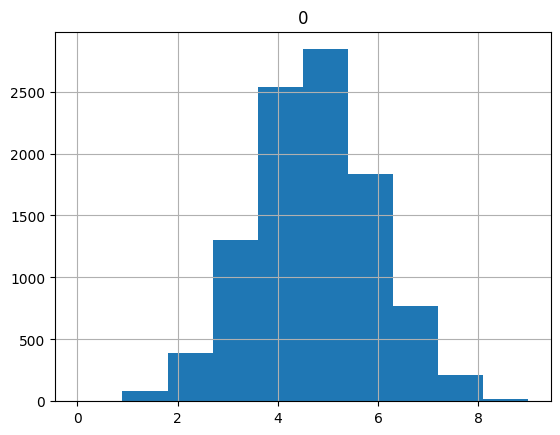

In [58]:
pd.DataFrame(binner1.fit_transform(playground[['diameter']])).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

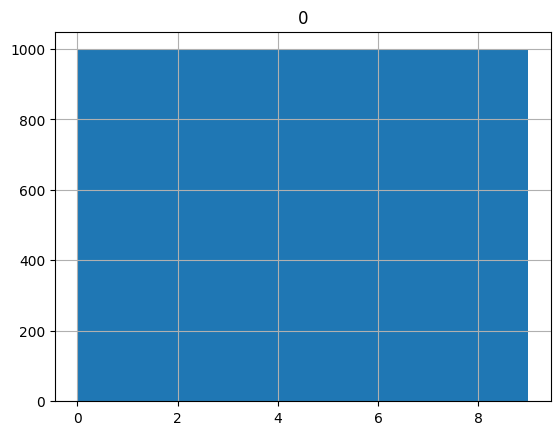

In [59]:
pd.DataFrame(binner2.fit_transform(playground[['diameter']])).hist()

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[<Axes: title={'center': '0'}>]], dtype=object)

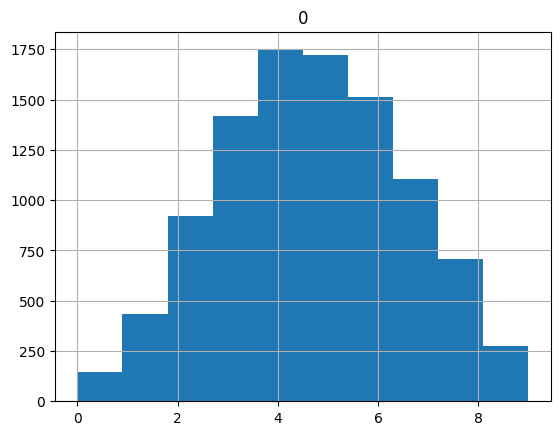

In [60]:
pd.DataFrame(binner3.fit_transform(playground[['diameter']])).hist()

### Feature Scaling

Task: apply a min-max scaling for the feature age.

In [61]:
mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(playground[['age']])

array([[0.3625],
       [0.025 ],
       [0.675 ],
       ...,
       [0.1625],
       [0.1875],
       [0.725 ]])

Task: apply a standardization to the features length_screw, diameter and hammer_strength.

In [62]:
sscaler = StandardScaler()
sscaler.fit_transform(playground[['length_screw', 'diameter', 'hammer_strength']])

array([[ 0.48064018,  0.38789898,  0.31349256],
       [-1.53966089, -1.71031482, -1.80210112],
       [ 0.5378606 , -0.56908024, -0.48523749],
       ...,
       [-1.11501183, -0.8439075 , -0.97529103],
       [ 0.17211597, -0.95371625, -0.98247117],
       [-0.07080558,  0.51831827,  0.40172249]])

### Pipeline

Here, we have to implement two pipelines composed by two transformers.
Task: define the first pipeline composed of:
1. SimpleImputer with strategy='mean'
2. StandardScaler

In [63]:
imp_scaler = Pipeline(
    [
        ('pipe1_si', SimpleImputer(strategy='mean')),
        ('pipe1_scaler', StandardScaler())
    ]
)
imp_scaler.fit_transform(playground[['length_screw', 'hammer_strength']])

array([[ 0.48064018,  0.31349256],
       [-1.53966089, -1.80210112],
       [ 0.5378606 , -0.48523749],
       ...,
       [-1.11501183, -0.97529103],
       [ 0.17211597, -0.98247117],
       [-0.07080558,  0.40172249]])

Task: define the second and the third pipelines composed of:
 Pipeline 2:
    1. SimpleImputer with strategy = 'most_frequent'
    2. OrdinalEncoder with categories = ['S','M','L','XL','XXL']
    3. MinMaxScaler
    
 Pipeline 3:
    1. OrdinalEncoder with categories = ['bad','medium','good','perfect']
    2. MinMaxScaler

In [64]:
imp_ordinal = Pipeline(
    [
        ('pipe2_si', SimpleImputer(strategy='most_frequent')),
        ('pipe2_ordinal', OrdinalEncoder(categories=[['S','M','L','XL','XXL']])),
        ('pipe2_mm', MinMaxScaler())
    ]
)

imp_ordinal2 = Pipeline(
    [
        ('pipe3_ordinal', OrdinalEncoder(categories=[['bad','medium','good','perfect']])),
        ('pipe3_mm', MinMaxScaler())
    ]
)

Once we defined the pipelines, we have all the transformers - ingredients - to build a ColumnTransformer to apply to our dataset.

### Column Transformer

Task: Implement the ColumnTransformer depicted before.
We are starting from the scratch, i.e. from the playground DataFrame loaded again and we are putting all the blocks together.

In [65]:
playground = pd.read_csv('data/playground.csv').dropna(thresh=6000, axis=1).dropna(axis=0, how='all')
playground

,age,length_screw,diameter,hammer_strength,rank,size,country
0,47.0,39.537837,17.053504,46.389102,medium,L,Denmark
1,20.0,-1.034592,-67.283321,-167.451060,good,XXL,Denmark
2,72.0,40.686959,-21.411874,-34.345003,medium,L,Austria
3,23.0,60.179331,39.712469,118.023664,perfect,XL,Austria
4,93.0,2.862281,33.059898,99.476390,perfect,XL,Germany
...,...,...,...,...,...,...,...
9995,80.0,29.688847,-8.900835,-15.037037,good,XXL,Denmark
9996,35.0,23.757652,54.140757,124.841787,medium,L,Germany
9997,31.0,7.493367,-32.458441,-83.878678,perfect,L,France
9998,33.0,33.341941,-36.872158,-84.604433,good,M,Austria


In [66]:
playground_tf = ColumnTransformer(
    transformers=[
        ('age', MinMaxScaler(), ['age']),
        ('imp_std', imp_scaler, ['length_screw', 'hammer_strength']),
        ('diam_std', StandardScaler(), ['diameter']),
        ('rank', imp_ordinal2, ['rank']),
        ('imp_ord', imp_ordinal, ['size']),
        ('country_hot', OneHotEncoder(drop='first', categories='auto'), ['country'])
    ],
    verbose_feature_names_out=False
)

In [67]:
playground_tf.fit(playground)
new_playground = pd.DataFrame(playground_tf.transform(playground), columns=playground_tf.get_feature_names_out())
new_playground

,age,length_screw,hammer_strength,diameter,rank,size,country_Canada,country_Denmark,country_France,country_Germany,country_Italy,country_Spain
0,0.3625,0.480640,0.313493,0.387899,0.333333,0.50,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0250,-1.539661,-1.802101,-1.710315,0.666667,1.00,0.0,1.0,0.0,0.0,0.0,0.0
2,0.6750,0.537861,-0.485237,-0.569080,0.333333,0.50,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0625,1.508482,1.022198,0.951631,1.000000,0.75,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9375,-1.345616,0.838703,0.786122,1.000000,0.75,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.7750,-0.009790,-0.294217,-0.257818,0.666667,1.00,0.0,1.0,0.0,0.0,0.0,0.0
9986,0.2125,-0.305133,1.089652,1.310592,0.333333,0.50,0.0,0.0,0.0,1.0,0.0,0.0
9987,0.1625,-1.115012,-0.975291,-0.843907,1.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0
9988,0.1875,0.172116,-0.982471,-0.953716,0.666667,0.25,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
new_playground.shape

(9990, 12)